<head>
<title>Fundamental Analysis of the S&P500 stock market:</title>

</head>

There are various factors responsible for stock market speculation and inefficiency. Investor emotions as well as illogical or unscientific methods used to choose entry and exit price or wether to buy one stock or other are common investor mistakes. 

Predicting stock price movements with precision has obvious benefits but has proven to be a very difficult endeavor since there are many aspects and reasons why a stock's price goes one way or the other. There are many theories of why prices move and how we can predict the direction and target price of any stock. 

In its core a price is set when a seller agrees to part with his stock at a certain price and a buyer is willing to purchase that stock at that specific price. When we have the meeting of two minds, a transaction happens. The final daily price of each stock which is the time frame I used to calculate average quarterly prices, is in the end decided by the cumulation of meeting of the minds of all of the market participants. 

My hypothesis is that if the majority of money in the market uses a certain trading strategy, then that strategy will by inference decide how the stock price is decided at the end of each day. Because statistically speaking, people trading at major trading desks in major monetary instutions(wether it be big banks or hedge funds etc. from now on referred to as institutional money) do not change very often and they are coveted by their institutions with very high salaries, the assumption is the trading strategies of such people, which is a major driver of companies stock prices, in each industry, does not change much over time. This in turn effect almost all other companies in that sector. 

According to investopedia:

"Institutional investors control a significant amount of all financial assets in the United States and exert considerable influence in all markets. This influence has grown over time and can be confirmed by examining the concentration of ownership by institutional investors in the equity of publicly traded corporations. Institutional investors own about 80% of equity market capitalization. As the size and importance of institutions continue to grow, so do their relative holdings and influence on the financial markets.

$88.5 trillion
The North American asset management industry controlled more than $88.5 trillion at the end of 2017, according to McKinsey estimates."

There is a certain stability in the underlying fundamental analysis done on each specific stock by people at these trading desks and our assumption is that trading trends on those stocks stay similar throughut long time periods.

In recent years algorithmic trading software has been gaining a large share of the entire stock market trading volume. The use of algorithms in trading increased after computerized trading systems were introduced in American financial markets during the 1970s. In 1976, the New York Stock Exchange introduced the Designated Order Turnaround (DOT) system for routing orders from traders to specialists on the exchange floor. In the following decades, exchanges enhanced their abilities to accept electronic trading, and by 2009, upwards of 60 percent of all trades in the U.S. were executed by computers.["Deutche Bank Research. "High-Frequency Trading: Reaching the Limits," Page 2. Accessed Oct. 26, 2020."]

With the easy access to share information and data, many investors worldwide are interested in predicting stock prices. My project is based on a personal approach to stock selection, with the use of fundamental information and respective return ratio using methods and parameters commonly used by professional financial analysts. 

The goal has been for the algorithm to identify and map correlations between different fundamental indictors like Price to Earnings/Sales ratio, Dividend Yield, Earnings Per Share percentage change etc. and the price range in consequtive quarters. The algorithm is meant to validate and aid us in our stock selection methodology by providing us a predicted range of high and low possible prices for the next quarter(s) based on the historic correlation between various variables extracted from within the companies Balance Sheets, Income Statements and Cashflow Statements.



In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 28 21:21:23 2020

@author: emanuele Ebrahimi

Project name: Fundamental Analysis of the entire S&P500 
"""

import pandas as pd
import pandas_datareader as pdr
from datetime import datetime as dt
import xlsxwriter
from datetime import date
from win32com.client import Dispatch


#setting viewing settings of pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#function to gather data from web source(for now its from file)
def get_data():
    
    #open file 
    global data_IncomeStatement
    data_IncomeStatement = pd.read_excel('IncomeStatement_full.xlsx', header=None, parse_dates=True)
    global data_BalanceSheet
    data_BalanceSheet = pd.read_excel('Balancesheet.xlsx', header=None, parse_dates=True)
    
 
    # clear empty columns from DataFrame
    deletable_col = [2,4,6,8,10,12,14,16,18]
    deletable_rows = [0,1,2,5,7,8]
    df_BalSheet = data_BalanceSheet.drop(data_IncomeStatement.columns[deletable_col]
                                           , axis=1)
    
    df_Inc = data_IncomeStatement.drop(data_IncomeStatement.columns[deletable_col]
                                       , axis=1)
#     df_BalSheet = data_BalanceSheet.drop(data_IncomeStatement.columns[deletable_col]
#                                        , axis=1)
    
    #reverse the order of the values columns to fit model
   
    df_Inc = df_Inc.iloc[:, 19:1:-1]
    df_Inc = df_Inc.T.reset_index(drop=True).T
    df_Inc.insert(0, 'Indicator', data_IncomeStatement.iloc[:][0])
    global df_inc
    
    return df_Inc, df_BalSheet
    #save data
    df_Inc.to_excel('Data_IncomeStatement_clean.xlsx')
    
#run data gathering function (get_data)    
df_Inc, df_BalSheet = get_data()
display (df_Inc[10:].head(15), df_BalSheet.dropna().head(15))

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,Indicator,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
10,Report Date,NaN,09/30/2006,NaN,09/29/2007,NaN,09/27/2008,NaN,09/26/2009,NaN,09/25/2010,09/24/2011,09/29/2012,09/28/2013,09/27/2014,09/26/2015,09/24/2016,09/30/2017,09/29/2018
11,Currency,NaN,USD,NaN,USD,NaN,USD,NaN,USD,NaN,USD,USD,USD,USD,USD,USD,USD,USD,USD
12,Audit Status,NaN,Not Qualified,NaN,Not Qualified,NaN,Not Qualified,NaN,Not Qualified,NaN,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified
13,Consolidated,NaN,Yes,NaN,Yes,NaN,Yes,NaN,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
14,Scale,NaN,Thousands,NaN,Thousands,NaN,Thousands,NaN,Thousands,NaN,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands
15,Products,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,-,-,-,-,-,-,-,-
16,Services,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,-,-,-,-,-,-,-,-
17,Net sales,NaN,19315000,NaN,24006000,NaN,32479000,NaN,36537000,NaN,65225000,108249000,156508000,170910000,182795000,233715000,215639000,229234000,265595000
18,Cost of sales - products,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,-,-,-,-,-,-,-,-
19,Cost of sales - services,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,-,-,-,-,-,-,-,-


,0,1,3,5,7,9,11,13,15,17,19
10,Report Date,12/28/2019,12/29/2018,12/30/2017,12/31/2016,12/26/2015,12/27/2014,12/28/2013,12/29/2012,12/31/2011,12/25/2010
11,Currency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
12,Audit Status,Not Qualified,Not Available,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified,Not Qualified
13,Consolidated,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
14,Scale,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands,Thousands
15,Cash & cash equivalents,1466000,1078000,1185000,1264000,785000,805000,869000,549000,869000,606000
16,Marketable securities,37000,78000,-,-,-,235000,228000,453000,896000,1183000
17,Total cash & cash equivalents & marketable sec...,-,-,-,-,-,-,-,1002000,1765000,1789000
18,"Accounts receivable, gross",-,-,-,-,-,-,832000,632000,921000,972000
19,Allowance for doubtful accounts,-,-,-,-,-,-,0,2000,2000,4000


First we need to get the price information using Pythons built in pandas_datareader.get_data_yahoo
Function which gives us all availible historic data for any specific stock("first we test our approach on one stock and later we will expand it to all stocks in the S&P500")

In [2]:
import pandas_datareader as pdr
from datetime import datetime
get_stock_info = 'AAPL'
# get_stock_info = input('Please enter the name of the stock: ')
stock_data = pdr.get_data_yahoo(symbols=get_stock_info, start=datetime(2007, 1, 1), 
                                end=datetime.today())
stock_data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,3.092143,2.925000,3.081786,2.992857,1.238320e+09,2.560825
2007-01-04,3.069643,2.993572,3.001786,3.059286,8.472604e+08,2.617664
2007-01-05,3.078571,3.014286,3.063214,3.037500,8.347416e+08,2.599023
2007-01-08,3.090357,3.045714,3.070000,3.052500,7.971068e+08,2.611857
2007-01-09,3.320714,3.041071,3.087500,3.306072,3.349298e+09,2.828825
2007-01-10,3.492857,3.337500,3.383929,3.464286,2.952880e+09,2.964200
2007-01-11,3.456429,3.396429,3.426429,3.421429,1.440253e+09,2.927529
2007-01-12,3.395000,3.329643,3.378214,3.379286,1.312690e+09,2.891471
2007-01-16,3.473214,3.408929,3.417143,3.467857,1.244076e+09,2.967256


Then we want to check and see the data type formats given to us

In [3]:
display(stock_data.index, stock_data.dtypes)

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-16'],
              dtype='datetime64[ns]', name='Date', length=3494, freq=None)

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In order to gain a visual understanding of our stock we can plot it using pythons
matplotlib.pyplot and seaborn

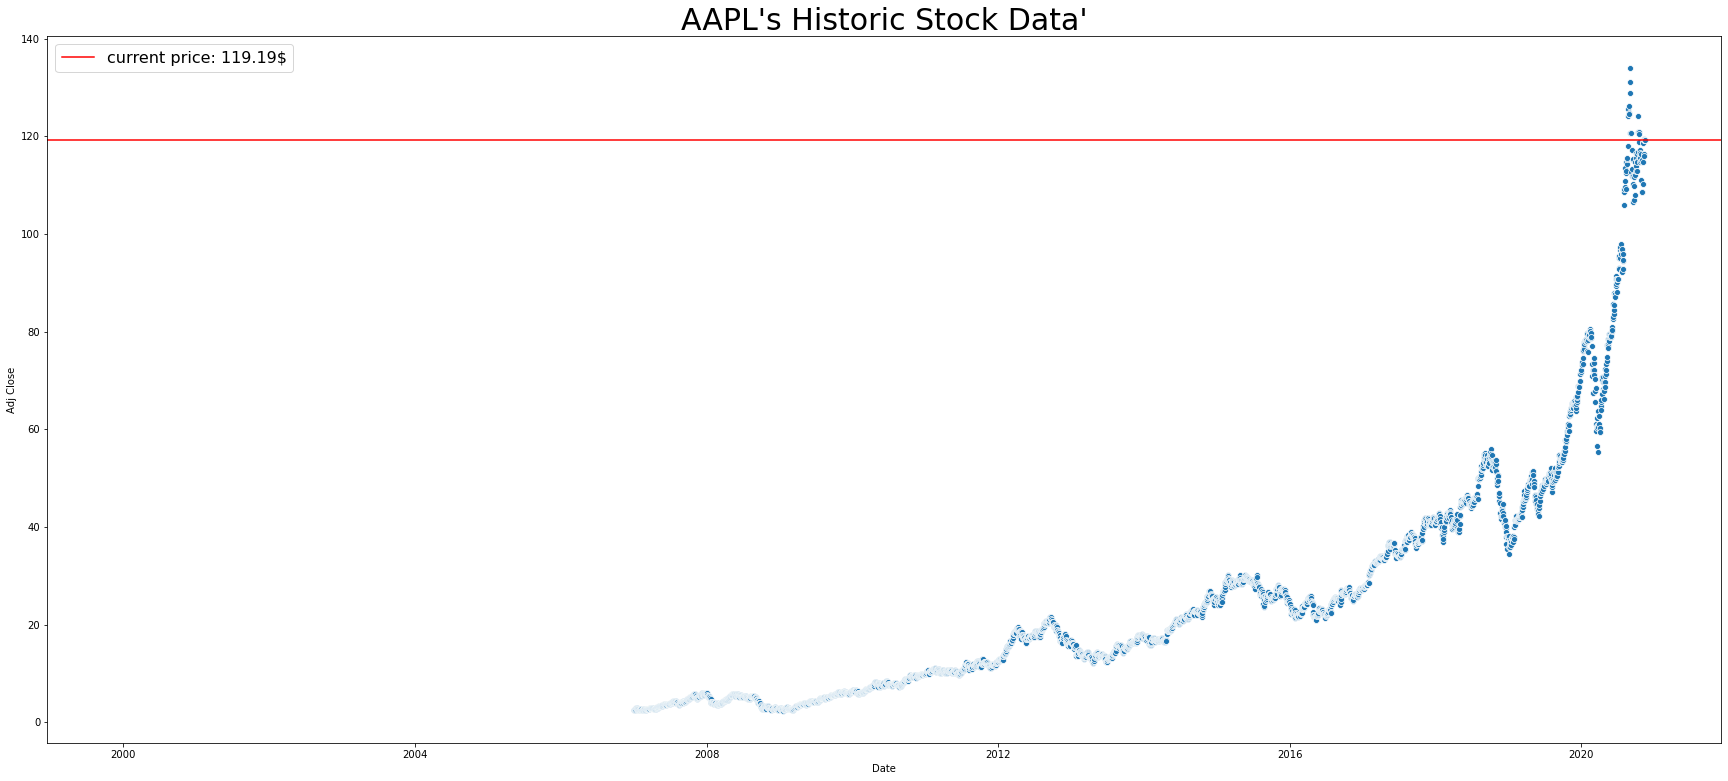

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
current_price = stock_data['Adj Close'][-1]
plt.figure(figsize = (30, 13))
sns.scatterplot(x = stock_data.index, y = stock_data['Adj Close'] , 
                   data=stock_data, palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.axhline(y=current_price, color = 'red', label = "current price: {}$".format(round(current_price, 2)))
plt.legend(prop= {'size': 16})
plt.title("{}'s Historic Stock Data'".format(get_stock_info), size = 30)
plt.show()

The factors used in our model are chosen by industry experts in their models from hundreds of indicators and to the best of the author's knowledge are most relevant in deciding the fundamental value of a company. If we are able to accurately evaluate the value of a company(presnt and future) and compare it to the expert's predictions (comparing to yahoo finance and google finance), while also using a sliding window to make past predictions into their future and analyzing margin of error, we can optimize our method to closely value a company and thus decide wether it is undervalued, overvalued, or fairly valued.
under valued is defined as being 3% or more lower than the price that we predict it should have and over valued is defined as having a price 3% and over the predicted price. Three percent is a commonly used tolerance margin for considering a price breakthrough by experts in th field, but can be set to any value the investor is comfortable with(the higher the margin the lower the risk of mistakes with the caveat that you might lose many trades if it is too high)


In [12]:
df = stock_data.copy()
df.reset_index(inplace = True)
df['Quarters'] = df['Date'].dt.quarter
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()
#group data into Quarters and average the price(s)
price_mean = df.pivot_table(index=['year', 'Quarters'], values=['Close', 'High', 'Low'], aggfunc='mean')

price_mean.head(10)

Close      High       Low
year Quarters                              
2007 1         3.161434  3.198688  3.124374
     2         3.868152  3.911213  3.819632
     3         4.843560  4.917976  4.756417
     4         6.378103  6.478594  6.254314
2008 1         4.969239  5.091739  4.861475
     2         6.198811  6.287919  6.089431
     3         5.719330  5.841925  5.604046
     4         3.390580  3.504258  3.277282
2009 1         3.341932  3.404854  3.276996
     2         4.621905  4.674467  4.550397

In [6]:
price_mean = pd.pivot_table(stock_data, values='Adj Close', columns=stock_data.index.year, aggfunc='mean')
#mean price for each year
price_mean = price_mean.T
price_mean.reset_index(inplace = True)

#High price for each year from beginning of dataset(default 2009)
year = stock_data.index.year
max_price = stock_data['High'].loc[stock_data.groupby(year)['High'].idxmax()].reset_index()
#Low price for each year from beginning of dataset(default 2009)
min_price = stock_data['Low'].loc[stock_data.groupby(year)['Low'].idxmin()].reset_index()

#changing 'Date' column(object) to datetime objects
max_price.Date = pd.to_datetime(max_price.Date)
min_price.Date = pd.to_datetime(min_price.Date)

#changing Date format to only show year in order to categorize based on year
max_price['Date'] = max_price['Date'].dt.year
min_price['Date'] = min_price['Date'].dt.year

#merging max and min price into one dataframe
max_min_price = pd.merge(max_price, min_price, how = 'outer')

#merging high price and low price with dates included
dec_df = max_min_price


#getting net income per share and merging with main dec_df
Net_inc_per_share = data_IncomeStatement.iloc[[10, 62]]
Net_inc_per_share.reset_index()
Net_inc_per_share.columns = Net_inc_per_share.iloc[0]
Net_inc_per_share.reset_index
Net_inc_per_share.reset_index(inplace = True)
Net_inc_per_share = Net_inc_per_share.drop(0, axis = 0).T
Net_inc_per_share = Net_inc_per_share.drop('index', axis = 0)
Net_inc_per_share = Net_inc_per_share.T

In [16]:
Net_inc_per_share.T.head()

,1
10,
Report Date,Net earnings (loss) per share - diluted
09/28/2019,2.973
NaN,NaN
09/29/2018,2.978
NaN,NaN


In [7]:
#Importing Quarterly stock data
IncomeStatement_Quarterly = pd.read_excel('asreported.xlsx')
IncomeStatement_Quarterly.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Powered by Clearbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Advanced Micro Devices Inc (NMS: AMD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#defining net revenue
def net_rev():
    net_rev = data_IncomeStatement.iloc[[10, 17]]
    net_rev = net_rev.T
    net_rev = net_rev[~(net_rev.index % 2 == 0)]
    net_rev.reset_index(inplace = True)
    net_rev.drop('index', axis = 1, inplace = True)
    net_rev = net_rev.rename(columns={10: "Date", 17: "Total Revenue"})
    return net_rev
net_rev = net_rev()

In [9]:
#turning dates to datetime formal and organizing by year
net_rev.Date = pd.to_datetime(net_rev.Date)
net_rev['Date'] = net_rev['Date'].dt.year
#merging net_revenue into main dataframe (dec_df)
dec_df = pd.merge(dec_df, net_rev, how = 'outer')

In [14]:
dec_df.head(10)

,Date,High,Low,Total Revenue
0,2007,7.248571,2.925000,24006000
1,2008,7.152143,2.826429,32479000
2,2009,7.641071,2.792857,36537000
3,2010,11.666429,6.794643,65225000
4,2011,15.239285,11.089286,108249000
5,2012,25.181072,14.607142,156508000
6,2013,20.540714,13.753572,170910000
7,2014,29.937500,17.626785,182795000
8,2015,33.634998,23.000000,233715000
9,2016,29.672501,22.367500,215639000
